In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Order by n in site
sites = ['USM', # why this missing?
        'SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'SZ2',
        'SZ1',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'NYU',
        'ADHD5',
        'UCLA_DS1']

site_labels = [
'USM                n=30',
'SZ3                  n=31',
'SZ6                  n=35',
'SVIP2              n=36',
'ADHD6            n=39',
'HSJ                  n=39',
'SZ2                  n=41',
'SZ1                  n=42',
'UCLA_CB        n=43',
'SVIP1               n=48',
'UKBB11026      n=50',
'UKBB11027      n=50',
'UKBB11025      n=50',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                  n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',]

p_age = '../../results_reviews/age/'

# Load Data

In [3]:
# Single Task

st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site]
        folds.append(df['Loss/test'].iloc[-1])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [4]:
df_st = pd.DataFrame(st_data)
df_st['type'] = 'baseline'
df_st

,USM,SZ3,SZ6,Svip2,ADHD6,HSJ,SZ2,SZ1,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,NYU,ADHD5,UCLA_DS1,type
0,6.755739,11.750413,9.173312,12.595748,0.260764,36.874842,13.747142,9.483705,3.719987,38.541802,12.930741,21.986327,19.130914,0.374115,0.304223,7.558113,1.144248,10.902731,baseline
1,6.147534,24.137181,11.495570,17.782614,0.386266,41.449777,33.633501,15.828989,5.163320,17.526113,9.605856,9.237770,19.698976,0.322742,0.359186,3.639930,0.608991,16.517193,baseline
2,8.425035,15.836527,6.702136,15.682583,0.246333,21.574457,9.676965,6.540520,5.309507,18.839404,12.834680,16.386208,28.259909,0.432206,0.517700,3.155297,1.649268,9.451723,baseline
3,10.966915,15.050240,11.581980,2.790650,0.278973,18.833980,9.648940,17.022497,0.874767,12.934075,32.334639,21.719876,37.203877,0.402719,0.422410,7.010237,0.531461,10.921706,baseline
4,5.377043,17.591083,11.552808,5.356280,0.170392,15.830257,12.965247,22.871412,4.028037,9.576302,22.956459,19.705244,25.168617,0.655788,0.505542,1.636331,0.534394,12.572304,baseline


In [5]:
# Multi-task

mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_age, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])
    acc = []
    for site in sites:
        acc.append(df[site]['Loss/test'].iloc[-1])
    mtl_data.append(acc)



In [6]:
df_mtl = pd.DataFrame(mtl_data,index=range(5),columns=sites)
df_mtl['type'] = 'mtl'
df_mtl

,USM,SZ3,SZ6,Svip2,ADHD6,HSJ,SZ2,SZ1,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,NYU,ADHD5,UCLA_DS1,type
0,4.967970,29.410580,7.374975,10.439663,0.332999,40.266294,10.842493,21.795155,17.271048,77.001751,7.816125,23.222334,14.683406,0.266941,0.321986,9.494037,1.090600,13.999582,mtl
1,1.629130,7.235071,12.515431,11.693939,0.149642,34.202200,13.154296,9.323095,8.673961,17.938354,25.885781,21.785553,14.197616,0.540422,0.377304,4.216503,1.004392,21.869094,mtl
2,4.216786,19.982400,11.144640,6.986190,1.214819,12.398385,4.504572,6.327995,5.197501,7.615895,19.234784,38.128406,22.756915,0.470825,0.694166,2.695150,1.711544,9.669982,mtl
3,9.406919,12.994206,14.353573,3.234179,0.334838,11.024141,8.012374,9.509590,1.496975,17.407299,12.337600,12.262041,11.572133,1.823753,0.981730,4.197659,0.715069,7.420835,mtl
4,7.110565,6.566432,10.957606,5.959980,1.263408,45.689843,4.553249,8.580700,3.999702,8.240149,12.969616,6.537023,10.848399,0.549684,1.484215,3.598092,1.134115,8.386524,mtl


In [7]:
df_master = pd.concat([df_mtl,df_st])
df_master

,USM,SZ3,SZ6,Svip2,ADHD6,HSJ,SZ2,SZ1,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,NYU,ADHD5,UCLA_DS1,type
0,4.967970,29.410580,7.374975,10.439663,0.332999,40.266294,10.842493,21.795155,17.271048,77.001751,7.816125,23.222334,14.683406,0.266941,0.321986,9.494037,1.090600,13.999582,mtl
1,1.629130,7.235071,12.515431,11.693939,0.149642,34.202200,13.154296,9.323095,8.673961,17.938354,25.885781,21.785553,14.197616,0.540422,0.377304,4.216503,1.004392,21.869094,mtl
2,4.216786,19.982400,11.144640,6.986190,1.214819,12.398385,4.504572,6.327995,5.197501,7.615895,19.234784,38.128406,22.756915,0.470825,0.694166,2.695150,1.711544,9.669982,mtl
3,9.406919,12.994206,14.353573,3.234179,0.334838,11.024141,8.012374,9.509590,1.496975,17.407299,12.337600,12.262041,11.572133,1.823753,0.981730,4.197659,0.715069,7.420835,mtl
4,7.110565,6.566432,10.957606,5.959980,1.263408,45.689843,4.553249,8.580700,3.999702,8.240149,12.969616,6.537023,10.848399,0.549684,1.484215,3.598092,1.134115,8.386524,mtl
0,6.755739,11.750413,9.173312,12.595748,0.260764,36.874842,13.747142,9.483705,3.719987,38.541802,12.930741,21.986327,19.130914,0.374115,0.304223,7.558113,1.144248,10.902731,baseline
1,6.147534,24.137181,11.495570,17.782614,0.386266,41.449777,33.633501,15.828989,5.163320,17.526113,9.605856,9.237770,19.698976,0.322742,0.359186,3.639930,0.608991,16.517193,baseline
2,8.425035,15.836527,6.702136,15.682583,0.246333,21.574457,9.676965,6.540520,5.309507,18.839404,12.834680,16.386208,28.259909,0.432206,0.517700,3.155297,1.649268,9.451723,baseline
3,10.966915,15.050240,11.581980,2.790650,0.278973,18.833980,9.648940,17.022497,0.874767,12.934075,32.334639,21.719876,37.203877,0.402719,0.422410,7.010237,0.531461,10.921706,baseline
4,5.377043,17.591083,11.552808,5.356280,0.170392,15.830257,12.965247,22.871412,4.028037,9.576302,22.956459,19.705244,25.168617,0.655788,0.505542,1.636331,0.534394,12.572304,baseline


# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_95971/2858565377.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_95971/2858565377.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_95971/2858565377.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_95971/2858565377.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_95971/2858565377.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx6

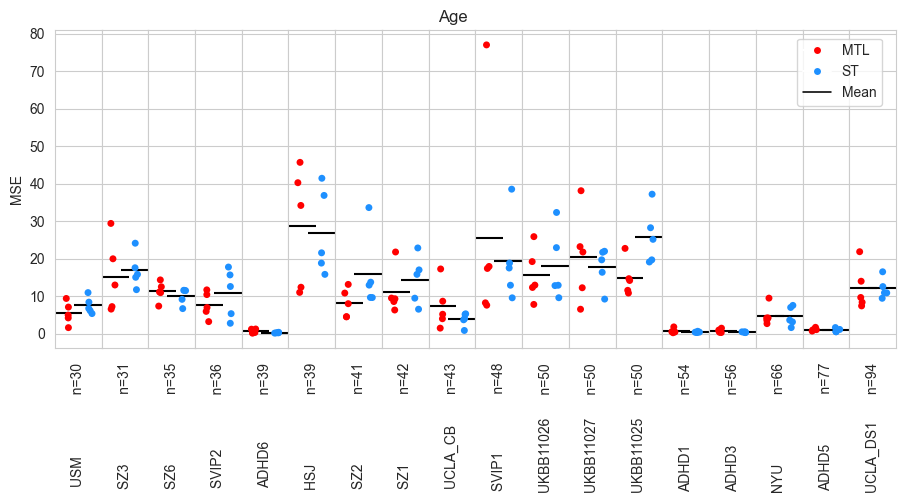

In [8]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,18,figsize=(9,5),sharey=True)
for i, site in enumerate(sites):
    sns.stripplot(data=df_master, x='type',y=site,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][site].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][site].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels([None,None])
    ax[i].set_xlabel(site_labels[i],rotation=90)
    
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('MSE')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], color='black', label='Mean',
                           linewidth=1.15,ls='-')
                          ]
labels = ['MTL','ST','Mean']
fig.legend(handles, labels, loc=(0.88,0.79))

plt.suptitle ('Age')
#plt.ylim(0,105)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/age_loss_distribution.png'),dpi=300)